# 2-1. 훈련 세트와 테스트 세트

In [1]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [5]:
cond = df['Species'].isin(['Bream', 'Smelt']) # isin(): 2개 이상의 데이터의 유무를 판단할 때 사용
lw_df = df.loc[cond, ['Length2', 'Weight']]
lw_df.values # 2차원 numpy의 list 형태
fish_data = lw_df.values.tolist()

In [6]:
fish_target = [1] * 35 + [0] * 14

In [11]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [9]:
train_input = fish_data[:35]
train_target = fish_target[:35] # 훈련 세트

test_input = fish_data[35:]
test_target = fish_target[35:] # 테스트 세트

In [12]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

## 샘플링 편향

- 훈련 세트에는 도미만, 테스트 세트에는 빙어만 들어있음

## 넘파이

In [13]:
import numpy as np

In [14]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

input_arr.shape # 샘플 수, 특성 수

(49, 2)

In [22]:
index = np.arange(49)
np.random.shuffle(index)
print(index)

[23 31 26  9 10 24 45 25 48 34 38 30 29 15 20 42 40 18 43 32 33  1  5 19
 16 14 37 13  6 44 17 46  7  4  3 35  0 27  8 22 47 28 21 41 36 11 39  2
 12]


In [23]:
train_input = input_arr[index[:35]] # 데이터를 섞어서 일부분을 사용
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

In [24]:
import matplotlib.pyplot as plt

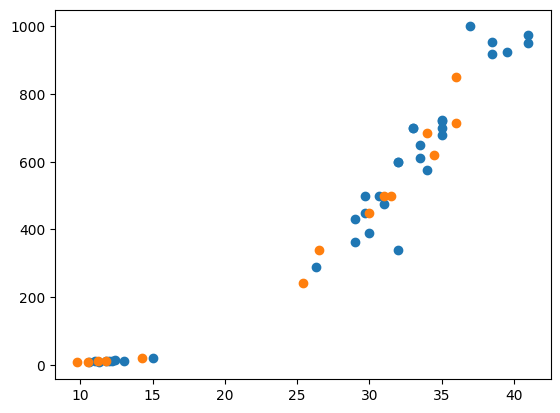

In [25]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1]) # 데이터들이 잘 섞였는지 확인

In [26]:
kn.fit(train_input, train_target) # 35개 학습
kn.score(test_input, test_target) # 14개 정답

1.0

In [27]:
kn.predict(test_input)

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

In [28]:
test_target # 똑같다

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

## 키워드

- 지도 학습: 입력과 타깃을 전달하여 모델을 훈련한 다음 새로운 데이터를 예측하는 데 활용
- 비지도 학습: 타킷 데이터가 없음, 입력 데이터에서 어떤 특징을 찾는 데 활용
- 훈련 세트: 모델을 훈련할 때 사용하는 데이터
- 테스트 세트: 평가에 사용하는 데이터

## 확인 문제

1. 샘플의 입력과 타깃을 알고 있을 때 사용하는 학습 방법 = 지도 학습
2. 훈련 세트와 테스트 세트가 잘못 만들어져 전체 데이터를 대표하지 못하는 현상 = 샘플링 편향
3. 사이킷런이 예상하는 데이터 배열 = (샘플, 특성)